In [2]:
import os
os.listdir('customer-churn-prediction-2020')

['sampleSubmission.csv', 'test.csv', 'train.csv']

## Steps 

1. Load train dataset
2. Count Unique and Null values - dataset does not have any null values which is good.
3. Convert Yes/No values to 1 and 0s
4. We will look at the distribution of the various columns - CHECK FOR CLASS IMBALANCE
    It is observed that 14% have churned. Thus there is a class imbalance

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
## pip install -U imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score


In [4]:
train = pd.read_csv('customer-churn-prediction-2020/train.csv')
print(train.columns)
train.head()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
train['voice_mail_plan'] = train['voice_mail_plan'].map({'yes': 1, 'no':0})
train['international_plan'] = train['international_plan'].map({'yes': 1, 'no':0})
train['churn'] = train['churn'].map({'yes': 1, 'no':0})

In [6]:
# checking features
cat = train.select_dtypes(include='O').keys()
# display variabels
cat

Index(['state', 'area_code'], dtype='object')

In [7]:
categorical_data = train[cat]

ohe = OneHotEncoder(categories='auto')

feature_arr = ohe.fit_transform(categorical_data).toarray()

ohe_labels = ohe.get_feature_names_out(cat)

features = pd.DataFrame(
               feature_arr,
               columns=ohe_labels)

In [8]:
features

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
train = train.drop(['state', 'area_code'], axis=1)

In [10]:
train = pd.concat([train, features], axis = 1)

In [11]:
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
train.isna().sum()

account_length             0
international_plan         0
voice_mail_plan            0
number_vmail_messages      0
total_day_minutes          0
                          ..
state_WV                   0
state_WY                   0
area_code_area_code_408    0
area_code_area_code_415    0
area_code_area_code_510    0
Length: 72, dtype: int64

In [13]:
train['churn'].value_counts()/4250

churn
0    0.859294
1    0.140706
Name: count, dtype: float64

In [14]:
train_y = train['churn']
train_x = train[train.columns[train.columns != 'churn']]

In [17]:
train_x

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4248,50,0,1,40,235.7,127,40.07,223.0,126,18.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Correcting Class Imbalance

In [36]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(train_x, train_y)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.33, random_state=42)

In [37]:
y_train_smote.value_counts()

churn
0    3652
1    3652
Name: count, dtype: int64

In [33]:
train_y.value_counts()

churn
0    3652
1     598
Name: count, dtype: int64

## Feature Importance

In [40]:
importances = clf.feature_importances_
feature_names = x_train_smote.columns
feature_importances = dict(zip(feature_names, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)


#for feature, importance in sorted_importances:
#    print(f"{feature}: {importance}")

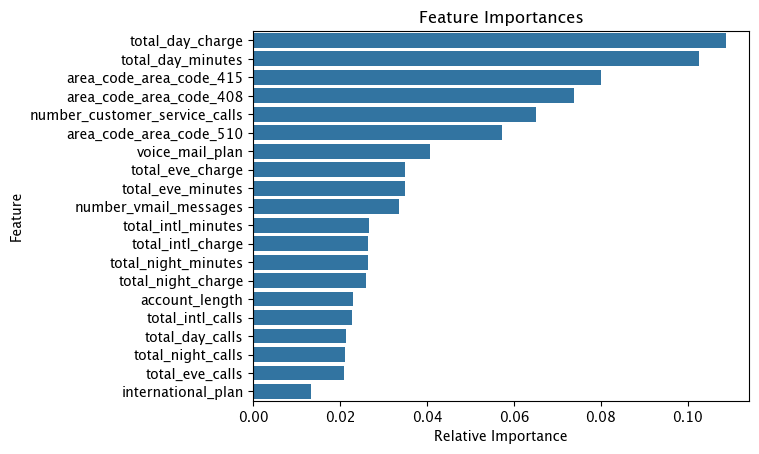

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature names and their importance values
feature_names = [x[0] for x in sorted_importances]
importances = [x[1] for x in sorted_importances]

# Create the bar plot
sns.barplot(x=importances[0:20], y=feature_names[0:20])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()



## Fitting a Random Forest Classifier Model

In [69]:
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 500, random_state=42)   
clf.fit(x_train, y_train) 
  
# performing predictions on the test dataset 
y_pred = clf.predict(x_test) 
  

print() 
  
# using metrics module for accuracy calculation 
accuracy =  round(metrics.accuracy_score(y_test, y_pred)*100,2)

precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)
f1 = round(f1_score(y_test, y_pred)*100,2)

print("Model: Random Forest Classifier:")
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model: Random Forest Classifier:
Accuracy:  95.73
Precision: 97.87
Recall: 93.31
F1 Score: 95.53


In [54]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1207   24]
 [  88 1092]]


## Random Forest Classifier 
* Accuracy with imbalanced classes: 94.44%  (0:3652, 1:598)
* Accuracy using SMOT for classes:  95.35%  (0:3652, 1:3652)


## XGBoost Classifier

In [78]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# Fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

y_pred_xgb = xgb_clf.predict(x_test)



In [79]:
accuracy_xgb =  round(metrics.accuracy_score(y_test, y_pred_xgb)*100,2)

precision_xgb = round(precision_score(y_test, y_pred_xgb)*100,2)
recall_xgb = round(recall_score(y_test, y_pred_xgb)*100,2)
f1_xgb = round(f1_score(y_test, y_pred_xgb)*100,2)

print("Model: XGBoost Classifier:")
print("XGBoost Accuracy: ", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)

Model: XGBoost Classifier:
XGBoost Accuracy:  97.35
XGBoost Precision: 98.52
XGBoost Recall: 96.02
XGBoost F1 Score: 97.25


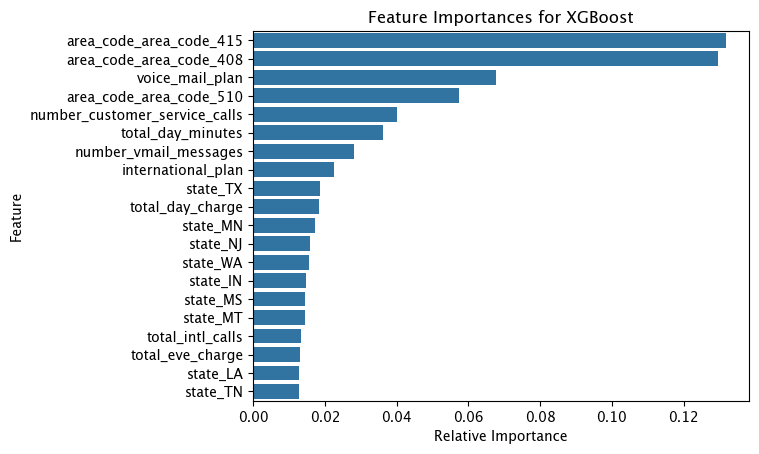

In [81]:
xgb_importances = xgb_clf.feature_importances_
xgb_feature_names = x_train_smote.columns
xgb_feature_importances = dict(zip(xgb_feature_names, xgb_importances))
xgb_sorted_importances = sorted(xgb_feature_importances.items(), key=lambda x: x[1], reverse=True)



xgb_feature_names = [x[0] for x in xgb_sorted_importances]
xgb_importances = [x[1] for x in xgb_sorted_importances]

# Create the bar plot
sns.barplot(x=xgb_importances[0:20], y=xgb_feature_names[0:20])
plt.title('Feature Importances for XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()